In [1]:
# Load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

# Garbage Collector
import gc

In [21]:
#data2 = data1.fillna(data1.mean(), inplace = True)

In [574]:
data = pd.read_csv('final.csv', parse_dates=[0], index_col=0, dayfirst=True)  # all data
data.head()

GenCalifornia...all.fuels..utility.scale..thousand.megawatthours  \
Month                                                                      
Jul-17                                        20980.32206                  
Jun-17                                        18260.48619                  
May-17                                        16878.55820                  
Apr-17                                        15436.06640                  
Mar-17                                        16101.84657                  

        GenCalifornia...coal.thousand.megawatthours  \
Month                                                 
Jul-17                                     23.12607   
Jun-17                                     26.82868   
May-17                                     14.41477   
Apr-17                                     19.33808   
Mar-17                                     27.06185   

        GenCalifornia...petroleum.liquids.thousand.megawatthours  \
Month                                                              
Jul-17                                            3.44655          
Jun-17                                            3.31392          
May-17                                            3.32468          
Apr-17                                            3.53045          
Mar-17                                            6.00000          

        GenCalifornia...petroleum.coke.thousand.megawatthours  \
Month                                                           
Jul-17                                                0.0       
Jun-17                                                0.0       
May-17                                                0.0       
Apr-17                                                0.0       
Mar-17                                                0.0       

        GenCalifornia...natural.gas.thousand.megawatthours  \
Month                                                        
Jul-17                                         9653.23988    
Jun-17                                         7191.91812    
May-17                                         5243.68841    
Apr-17                                         4248.56449    
Mar-17                                         4816.73759    

        GenCalifornia...other.gases.thousand.megawatthours  \
Month                                                        
Jul-17                                          111.09914    
Jun-17                                          118.54188    
May-17                                          136.91117    
Apr-17                                          129.62659    
Mar-17                                          118.23473    

        GenCalifornia...nuclear.thousand.megawatthours  \
Month                                                    
Jul-17                                        1648.012   
Jun-17                                         959.831   
May-17                                         840.135   
Apr-17                                        1412.868   
Mar-17                                        1569.141   

        GenCalifornia...conventional.hydroelectric.thousand.megawatthours  \
Month                                                                       
Jul-17                                         4371.98080                   
Jun-17                                         4455.83824                   
May-17                                         4972.12223                   
Apr-17                                         4397.51087                   
Mar-17                                         4481.18059                   

        GenCalifornia...other.renewables.thousand.megawatthours  \
Month                                                             
Jul-17                                         5008.53970         
Jun-17                                         5388.18090         
May-17                                         5532.79051         
Apr-

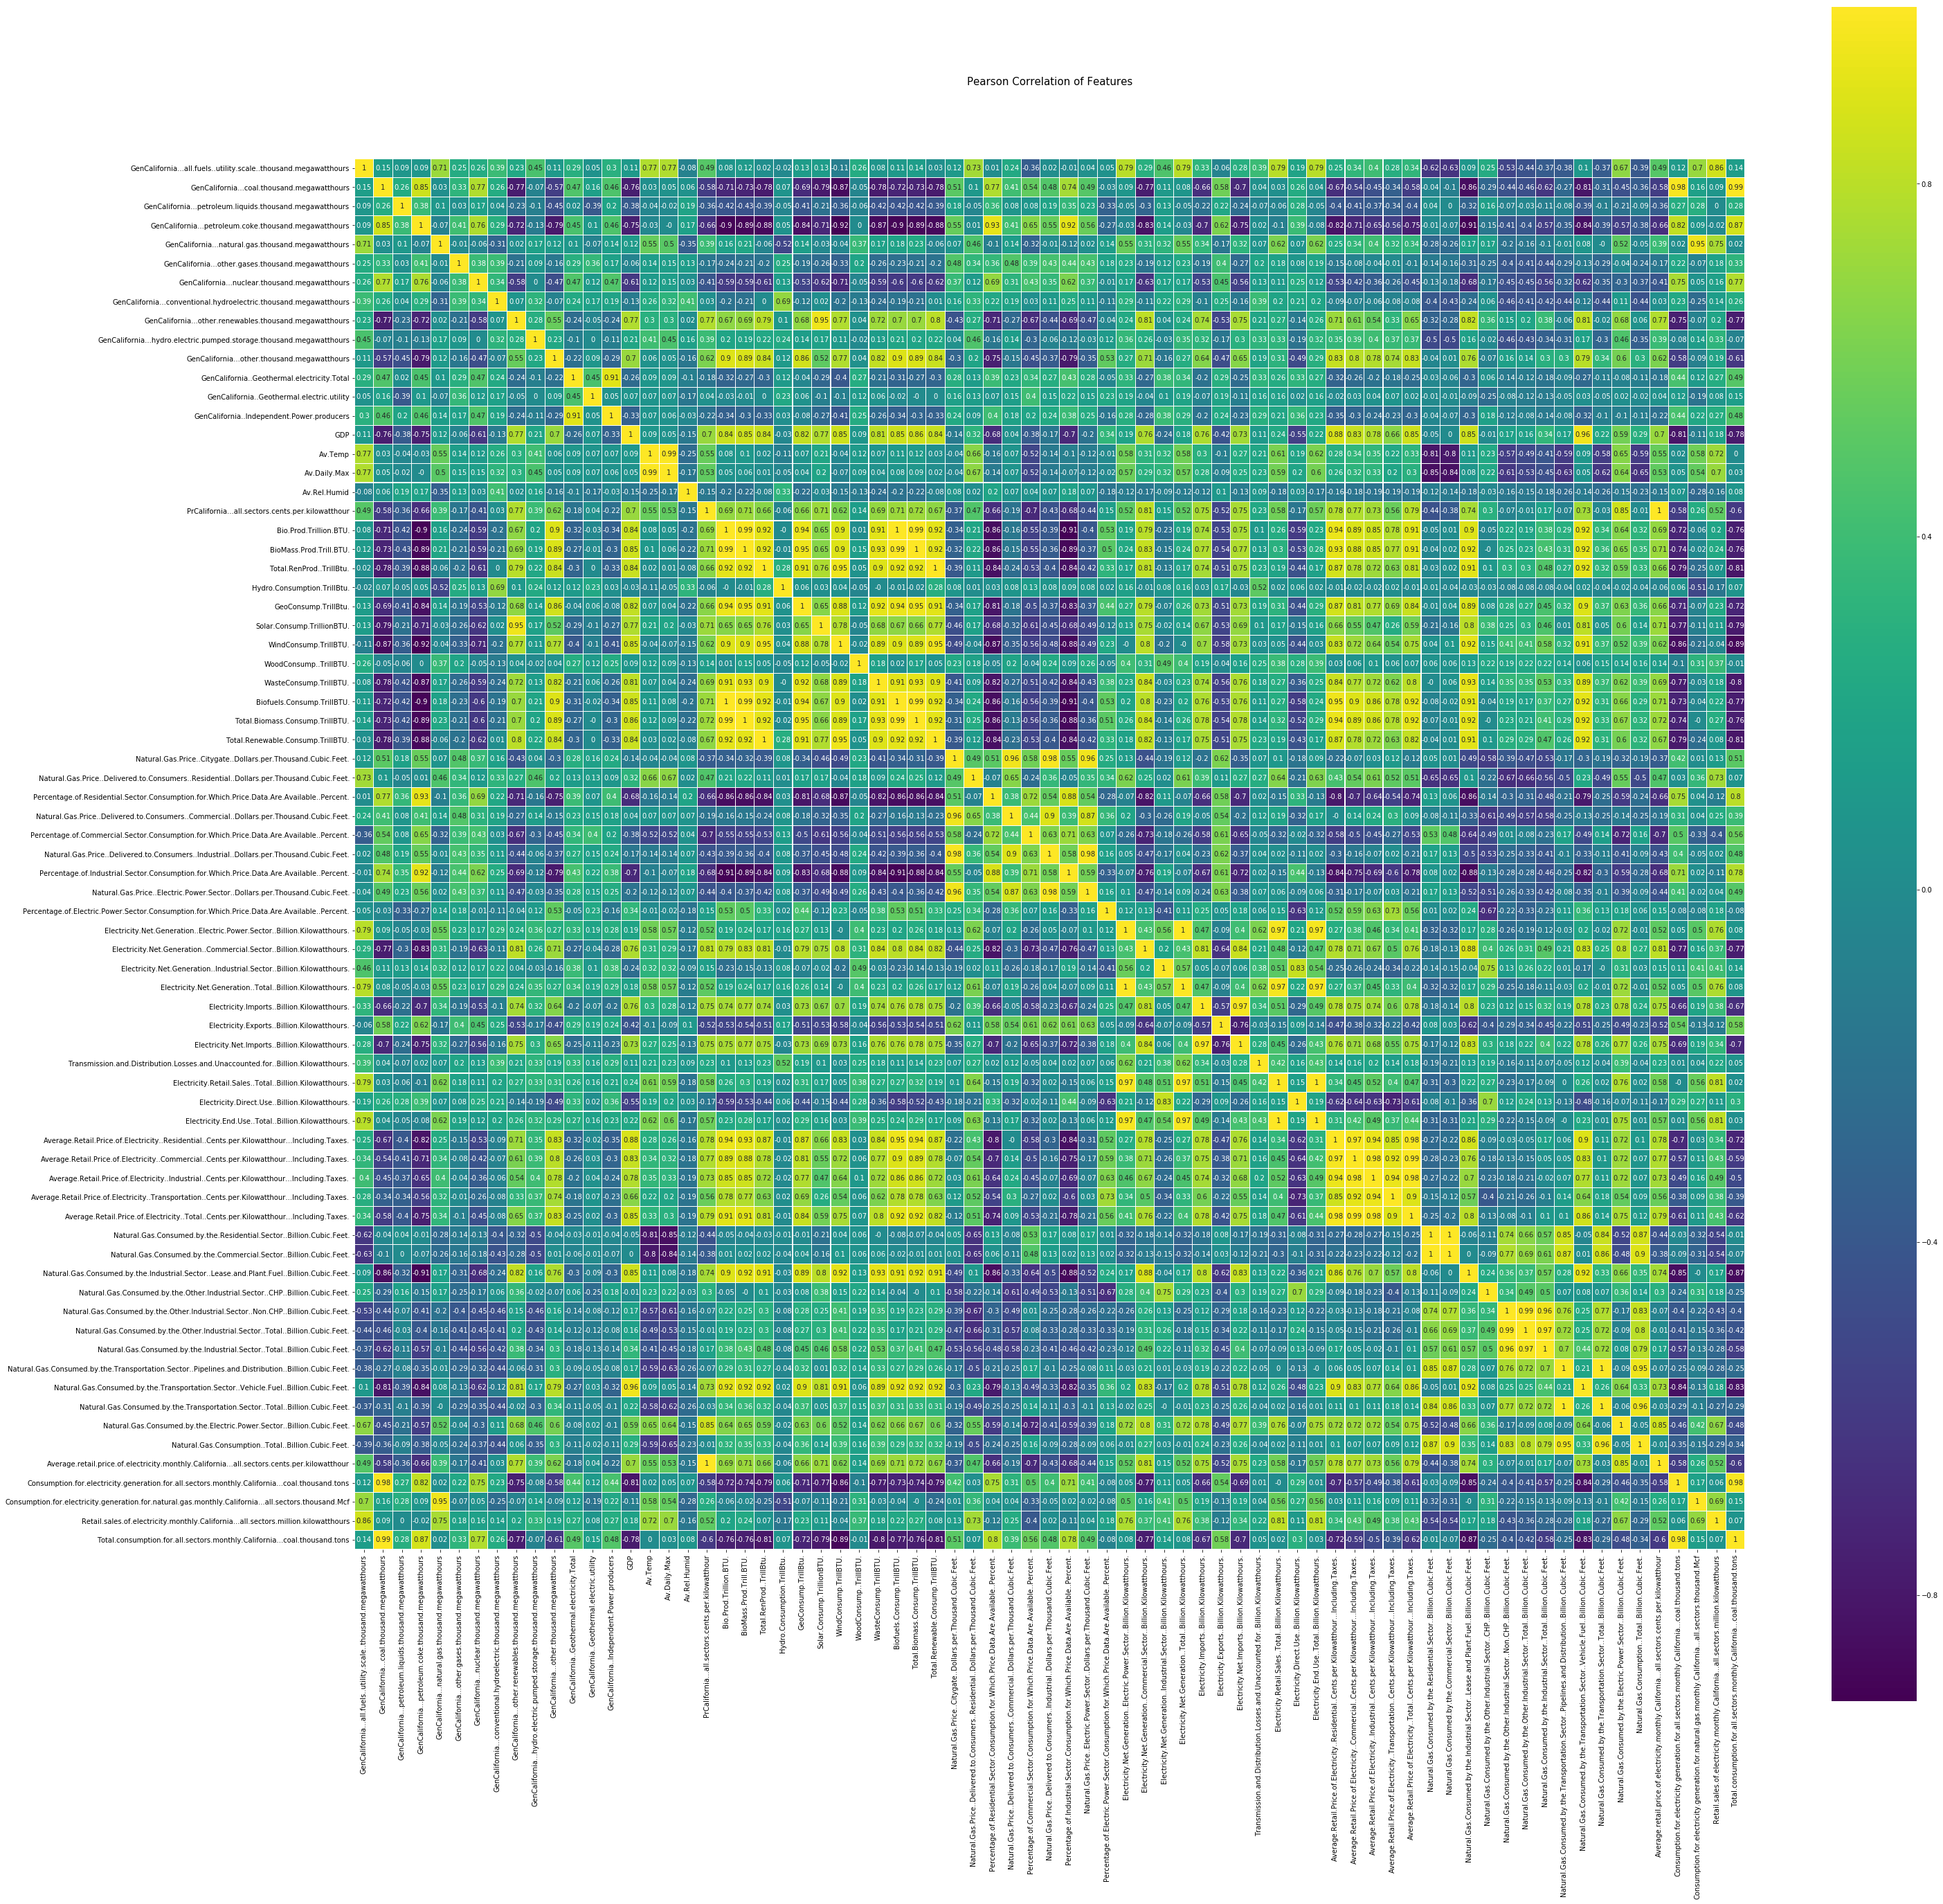

In [575]:
# Check correlation between features 
# (uncorrelated features are generally more powerful predictors)
colormap = plt.cm.viridis
plt.figure(figsize=(45,45))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

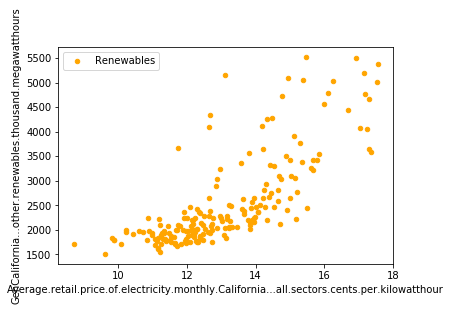

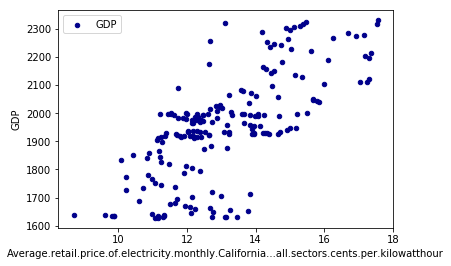

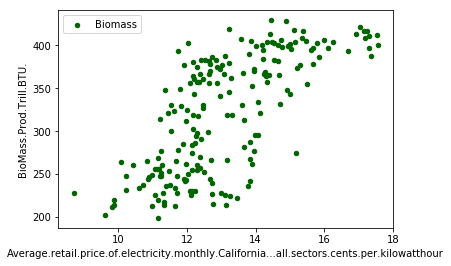

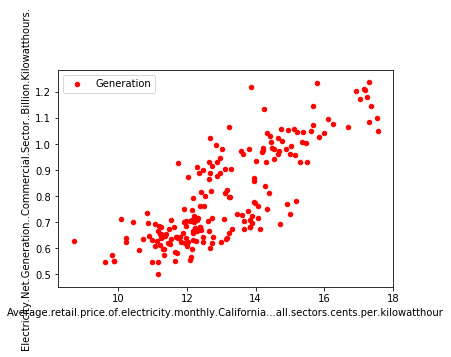

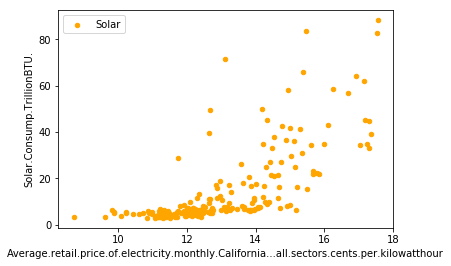

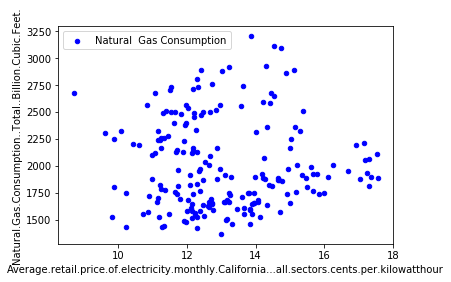

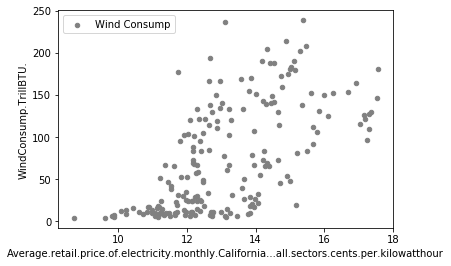

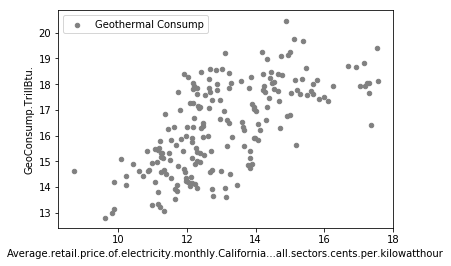

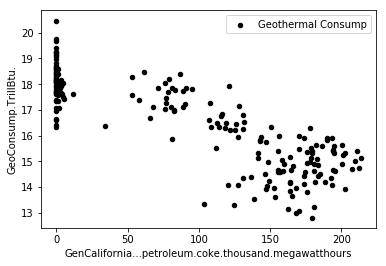

In [11]:
#data.plot(kind='scatter', x='NP15', y='PG&E')
plt.figure(figsize=(20,20))
ax = data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour', y='GenCalifornia...other.renewables.thousand.megawatthours', color='Orange',  label='Renewables');
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour', y='GDP', color='DarkBlue',         label='GDP');  
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',  y='BioMass.Prod.Trill.BTU.', color='DarkGreen',      label='Biomass'); 
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',  y='Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.', color='Red',      label='Generation'); 
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',  y='Solar.Consump.TrillionBTU.', color='Orange',      label='Solar'); 
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',  y='Natural.Gas.Consumption..Total..Billion.Cubic.Feet.', color='Blue',      label='Natural  Gas Consumption');
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',  y='WindConsump.TrillBTU.', color='Gray',      label='Wind Consump');
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',  y='GeoConsump.TrillBtu.', color='Gray',      label='Geothermal Consump');
data.plot(kind='scatter', x='GenCalifornia...petroleum.coke.thousand.megawatthours',  y='GeoConsump.TrillBtu.', color='Black',      label='Geothermal Consump');

In [576]:
data1 = pd.read_csv('Retail Average Data Set.csv')

In [577]:
data1.head() # show first five values

Month  GenCalifornia...petroleum.coke.thousand.megawatthours  \
0  07-01-2017                                                0.0       
1  06-01-2017                                                0.0       
2  05-01-2017                                                0.0       
3  04-01-2017                                                0.0       
4  03-01-2017                                                0.0       

   GenCalifornia...other.renewables.thousand.megawatthours     GDP  \
0                                         5008.53970        2315.0   
1                                         5388.18090        2330.0   
2                                         5532.79051        2325.0   
3                                         5155.78836        2320.0   
4                                         5062.00859        2315.0   

   BioMass.Prod.Trill.BTU.  GeoConsump.TrillBtu.  Solar.Consump.TrillionBTU.  \
0                  411.792                19.407                      82.763   
1                  400.461                18.140                      88.257   
2                  404.818                18.644                      83.532   
3                  388.275                19.221                      71.658   
4                  416.970                19.676                      65.959   

   WindConsump.TrillBTU.  \
0                146.410   
1                181.058   
2                208.060   
3                236.731   
4                238.556   

   Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.  \
0                                              1.102                       
1                                              1.050                       
2                                              1.006                       
3                                              0.903                       
4                                              1.045                       

   Electricity.Imports..Billion.Kilowatthours.  \
0                                        6.617   
1                                        5.742   
2                                        5.042   
3                                        5.470   
4                                        4.823   

   Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.  \
0                                            136.431                                          
1                                            130.701                                          
2                                            133.635                                          
3                                            128.994                                          
4                                            133.076                                          

   Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.  \
0                                             53.572                                                    
1                                             47.968                                                    
2                                             47.874                                                    
3                                             48.577                                                    
4                                             63.788                                                    

   Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.  \
0                                           1051.503                        
1                                            834.144                        
2                                            697.129                        
3                                            613.895                        
4                                            667.123                        

   Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per

In [578]:
data1.index

RangeIndex(start=0, stop=199, step=1)

In [579]:
type(data1['Month'][0])


str

In [580]:
data1.index = pd.to_datetime(data1['Month']) # set index

In [581]:
data1.head()

Month  GenCalifornia...petroleum.coke.thousand.megawatthours  \
Month                                                                           
2017-07-01  07-01-2017                                                0.0       
2017-06-01  06-01-2017                                                0.0       
2017-05-01  05-01-2017                                                0.0       
2017-04-01  04-01-2017                                                0.0       
2017-03-01  03-01-2017                                                0.0       

            GenCalifornia...other.renewables.thousand.megawatthours     GDP  \
Month                                                                         
2017-07-01                                         5008.53970        2315.0   
2017-06-01                                         5388.18090        2330.0   
2017-05-01                                         5532.79051        2325.0   
2017-04-01                                         5155.78836        2320.0   
2017-03-01                                         5062.00859        2315.0   

            BioMass.Prod.Trill.BTU.  GeoConsump.TrillBtu.  \
Month                                                       
2017-07-01                  411.792                19.407   
2017-06-01                  400.461                18.140   
2017-05-01                  404.818                18.644   
2017-04-01                  388.275                19.221   
2017-03-01                  416.970                19.676   

            Solar.Consump.TrillionBTU.  WindConsump.TrillBTU.  \
Month                                                           
2017-07-01                      82.763                146.410   
2017-06-01                      88.257                181.058   
2017-05-01                      83.532                208.060   
2017-04-01                      71.658                236.731   
2017-03-01                      65.959                238.556   

            Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.  \
Month                                                                               
2017-07-01                                              1.102                       
2017-06-01                                              1.050                       
2017-05-01                                              1.006                       
2017-04-01                                              0.903                       
2017-03-01                                              1.045                       

            Electricity.Imports..Billion.Kilowatthours.  \
Month                                                     
2017-07-01                                        6.617   
2017-06-01                                        5.742   
2017-05-01                                        5.042   
2017-04-01                                        5.470   
2017-03-01                                        4.823   

            Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.  \
Month                                                                                                  
2017-07-01                                            136.431                                          
2017-06-01                                            130.701                                          
2017-05-01                                            133.635                                          
2017-04-01                                            128.994                                          
2017-03-01                                            133.076                                          

            Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.  \
Month                                                                                                            
2017-07-01                                  

In [582]:
data1.drop(['Month'], axis=1, inplace=True)
data.head()

GenCalifornia...all.fuels..utility.scale..thousand.megawatthours  \
Month                                                                      
Jul-17                                        20980.32206                  
Jun-17                                        18260.48619                  
May-17                                        16878.55820                  
Apr-17                                        15436.06640                  
Mar-17                                        16101.84657                  

        GenCalifornia...coal.thousand.megawatthours  \
Month                                                 
Jul-17                                     23.12607   
Jun-17                                     26.82868   
May-17                                     14.41477   
Apr-17                                     19.33808   
Mar-17                                     27.06185   

        GenCalifornia...petroleum.liquids.thousand.megawatthours  \
Month                                                              
Jul-17                                            3.44655          
Jun-17                                            3.31392          
May-17                                            3.32468          
Apr-17                                            3.53045          
Mar-17                                            6.00000          

        GenCalifornia...petroleum.coke.thousand.megawatthours  \
Month                                                           
Jul-17                                                0.0       
Jun-17                                                0.0       
May-17                                                0.0       
Apr-17                                                0.0       
Mar-17                                                0.0       

        GenCalifornia...natural.gas.thousand.megawatthours  \
Month                                                        
Jul-17                                         9653.23988    
Jun-17                                         7191.91812    
May-17                                         5243.68841    
Apr-17                                         4248.56449    
Mar-17                                         4816.73759    

        GenCalifornia...other.gases.thousand.megawatthours  \
Month                                                        
Jul-17                                          111.09914    
Jun-17                                          118.54188    
May-17                                          136.91117    
Apr-17                                          129.62659    
Mar-17                                          118.23473    

        GenCalifornia...nuclear.thousand.megawatthours  \
Month                                                    
Jul-17                                        1648.012   
Jun-17                                         959.831   
May-17                                         840.135   
Apr-17                                        1412.868   
Mar-17                                        1569.141   

        GenCalifornia...conventional.hydroelectric.thousand.megawatthours  \
Month                                                                       
Jul-17                                         4371.98080                   
Jun-17                                         4455.83824                   
May-17                                         4972.12223                   
Apr-17                                         4397.51087                   
Mar-17                                         4481.18059                   

        GenCalifornia...other.renewables.thousand.megawatthours  \
Month                                                             
Jul-17                                         5008.53970         
Jun-17                                         5388.18090         
May-17                                         5532.79051         
Apr-

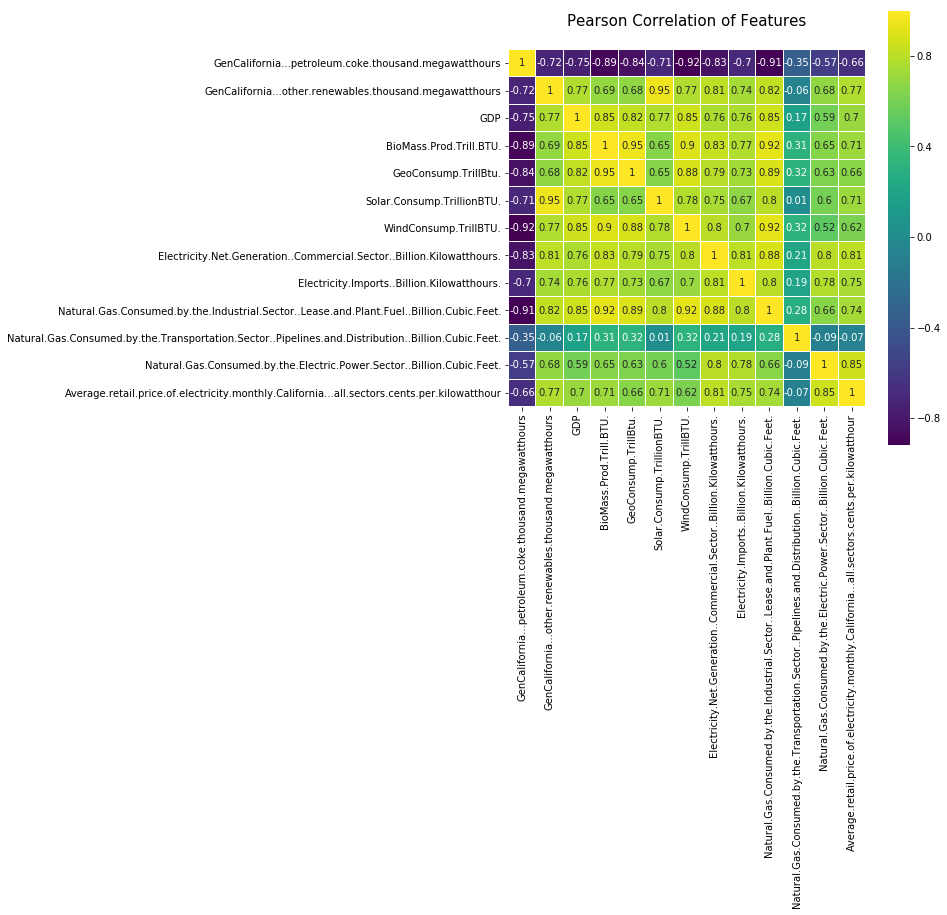

In [35]:
#heatmap again
colormap = plt.cm.viridis
plt.figure(figsize=(8,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data1.astype(float).corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

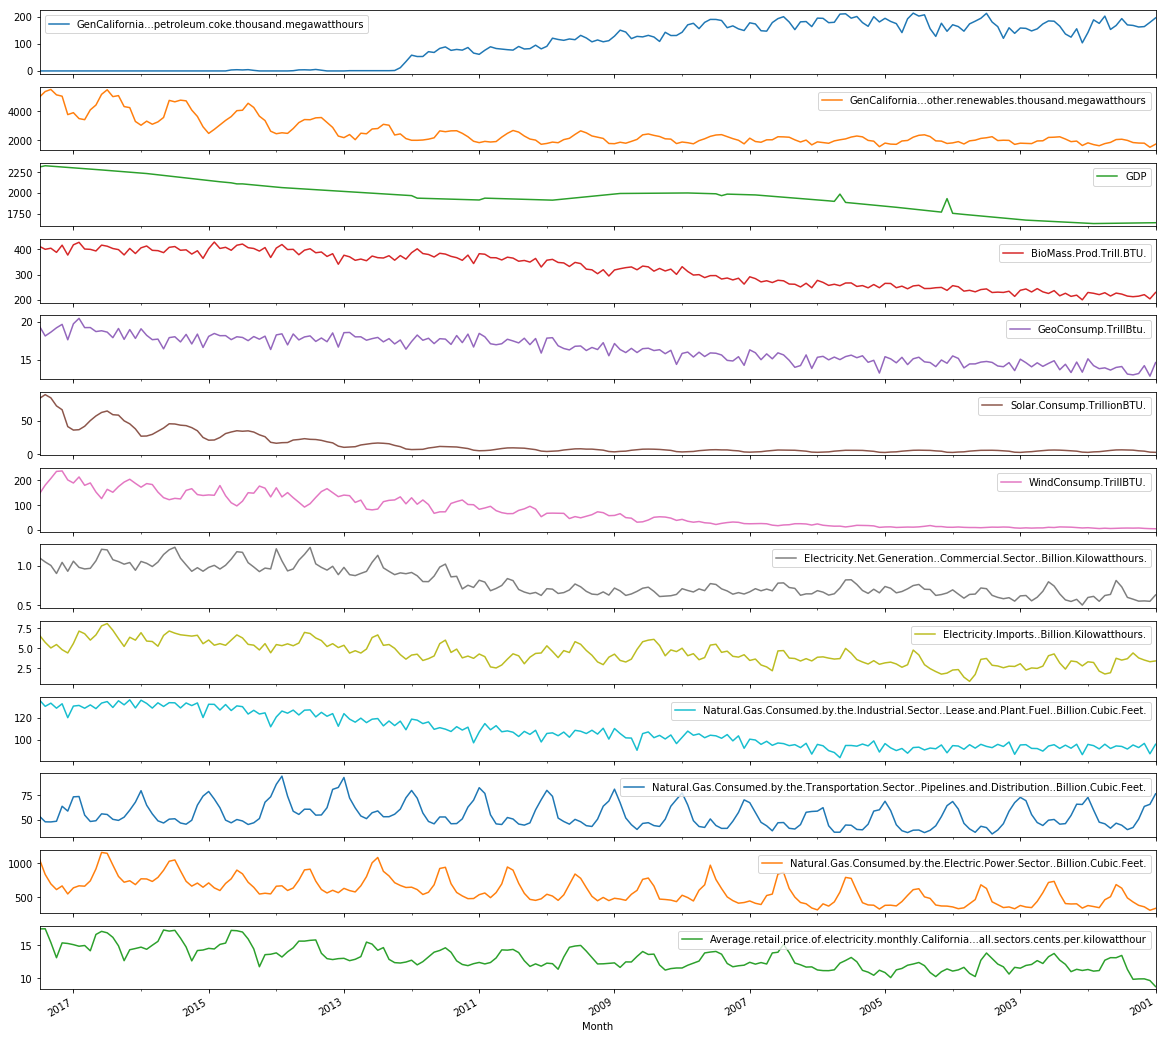

In [36]:
data1.plot(subplots=True, figsize=(20, 20)); # Plotting Individual Columns

Coefficients: [ -3.75460309e-03   5.58448904e-05   1.70093718e-03   6.86299901e-03
  -1.57097096e-01   1.96085043e-02  -9.90569496e-03   1.37030425e+00
  -8.23015447e-02   1.47720951e-02  -1.25984047e-02   4.57632797e-03]
Mean squared error: 0.5467805985558081


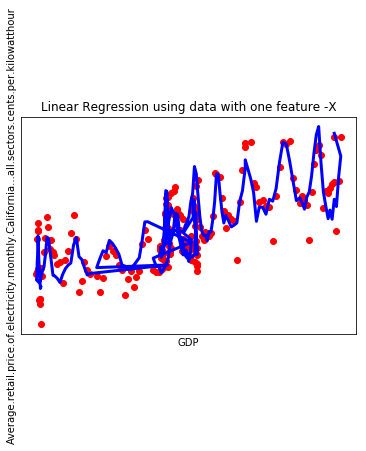

In [583]:
from sklearn.linear_model import LinearRegression

X_reg= data1.drop('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour', axis = 1)

Y_reg=data1['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour']

regr = LinearRegression()

regr.fit(X_reg, Y_reg)
Z_reg=regr.predict(X_reg)

print('Coefficients:', regr.coef_)
print("Mean squared error:",np.mean((Z_reg - Y_reg) ** 2))

plt.scatter(X_reg['GDP'], Y_reg,  color='red')
plt.plot(X_reg['GDP'], Z_reg, color='blue',
         linewidth=3)
plt.xlabel('GDP')
plt.ylabel('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour')
plt.title('Linear Regression using data with one feature -X')
plt.xticks(())
plt.yticks(())

plt.show()

In [78]:
#y_reg = Y_reg.values.reshape(1,-1)

In [667]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.4, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))

Number of samples in training data: 119
Number of samples in validation data: 80


In [668]:
from sklearn import linear_model
linear_model = linear_model.LinearRegression()
linear_model.fit(x_train, y_train)
training_accuracy=linear_model.score(x_train,y_train)
print ('Training Accuracy:',training_accuracy)
validation_accuracy=linear_model.score(x_test,y_test)
print('Accuracy of the model on unseen validation data: ',validation_accuracy)
y_pred = linear_model.predict(x_test)

Training Accuracy: 0.843389307629
Accuracy of the model on unseen validation data:  0.769872215975


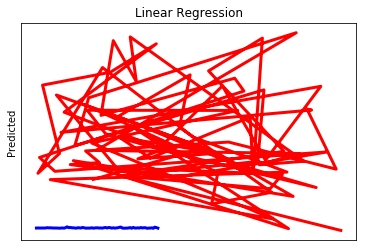

In [705]:
plt.plot(y_pred, color='blue',
         linewidth=3)
plt.plot(y_test, color='red',
         linewidth=3)
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.xticks(())
plt.yticks(())

plt.show()

In [669]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [588]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
mms = MinMaxScaler()
mmstrain = mms.fit_transform(x_train)
mmstest = mms.fit_transform(x_test)
ymmstrain = mms.fit_transform(y_train)
ymmstest = mms.fit_transform(y_test)
logreg = LogisticRegression()

In [453]:
dfmmstrain = pd.DataFrame(mmstrain)
dfmmstrain.head()

0         1         2         3         4         5         6   \
0  0.000000  0.461769  0.649401  0.937224  0.764307  0.271342  0.702013   
1  0.818914  0.050639  0.281319  0.217331  0.255154  0.009700  0.022662   
2  0.798129  0.078481  0.528983  0.508225  0.459997  0.011636  0.129939   
3  0.056245  0.230975  0.495162  0.793312  0.691365  0.099925  0.551963   
4  0.004687  0.315874  0.525243  0.785123  0.717025  0.155723  0.326469   

         7         8         9         10        11  
0  0.639566  0.652636  0.774992  0.538900  0.298999  
1  0.211382  0.300856  0.123038  0.138838  0.076359  
2  0.252033  0.443693  0.459221  0.489150  0.222667  
3  0.556911  0.462324  0.631523  0.415780  0.435606  
4  0.739837  0.757935  0.665669  0.352004  0.833329

In [523]:
dfmmstest = pd.DataFrame(mmstest)
dfmmstest

0         1         2         3         4         5         6   \
0   0.877391  0.114511  0.518098  0.364121  0.442562  0.007164  0.087739   
1   0.709178  0.012874  0.542400  0.531506  0.394930  0.032804  0.207611   
2   0.564754  0.134196  0.501343  0.420640  0.448432  0.070621  0.320819   
3   0.573874  0.022897  0.430814  0.626448  0.515143  0.039019  0.293525   
4   0.704631  0.101765  0.547700  0.470724  0.374917  0.064388  0.218571   
5   0.907369  0.074770  0.143648  0.089319  0.194396  0.044100  0.014874   
6   0.868675  0.000881  0.547759  0.396169  0.315811  0.024963  0.118235   
7   0.648493  0.262722  0.471116  0.605782  0.511541  0.091773  0.203544   
8   0.000000  0.332086  0.590968  0.786642  0.742228  0.239822  0.693080   
9   0.351284  0.094530  0.450997  0.772603  0.647899  0.111384  0.462343   
10  0.753204  0.081039  0.458514  0.227723  0.133956  0.054566  0.088454   
11  0.766641  0.072288  0.524030  0.337966  0.321815  0.039561  0.115959   
12  0.816699  0.142807  0.028332  0.016527  0.090594  0.057834  0.026377   
13  0.699102  0.057804  0.280705  0.192820  0.310607  0.032160  0.020841   
14  0.736876  0.000000  0.521064  0.230206  0.169179  0.012481  0.090941   
15  0.801073  0.016268  0.008200  0.009739  0.024283  0.041475  0.005334   
16  0.839496  0.070026  0.005467  0.011217  0.014410  0.060239  0.004585   
17  0.954055  0.093375  0.004100  0.047436  0.147698  0.065049  0.002866   
18  0.842113  0.019307  0.182631  0.202247  0.335290  0.000915  0.019425   
19  0.000000  0.292279  0.763197  1.000000  0.732355  0.311408  0.643049   
20  0.000000  1.000000  0.967531  0.943766  0.780654  1.000000  0.578077   
21  0.375198  0.262381  0.438889  0.738384  0.539026  0.143189  0.483785   
22  0.000000  0.752826  0.935062  0.764117  0.628152  0.791204  0.899505   
23  0.000000  0.255321  0.667106  0.717121  0.448566  0.253743  0.610968   
24  0.601120  0.222611  0.481192  0.504401  0.431221  0.083085  0.233743   
25  0.733126  0.032496  0.507039  0.270634  0.268579  0.019035  0.092348   
26  0.595034  0.073229  0.096845  0.078066  0.144363  0.040459  0.024485   
27  0.398420  0.136272  0.447970  0.672108  0.551034  0.097971  0.304178   
28  0.828631  0.086741  0.002733  0.066046  0.132088  0.062847  0.000000   
29  0.821649  0.105238  0.526996  0.306941  0.246031  0.048808  0.121874   
30  0.387621  0.211950  0.444943  0.722876  0.630554  0.113094  0.284523   
31  0.170434  0.106327  0.509044  0.688125  0.454570  0.086929  0.476295   
32  0.959648  0.015627  0.312135  0.244162  0.321681  0.000000  0.025690   
33  0.722910  0.007830  0.448693  0.115576  0.205737  0.004369  0.020491   
34  0.891743  0.144343  0.115566  0.076864  0.220547  0.054718  0.022267   
35  0.325818  0.052311  0.426782  0.606378  0.493129  0.056801  0.458896   
36  0.000000  0.382515  0.753588  0.882914  0.693262  0.373984  0.832785   
37  0.786770  0.070035  0.087484  0.099967  0.217078  0.031314  0.021734   
38  0.950089  0.068680  0.269808  0.144627  0.182121  0.044134  0.023765   
39  0.446365  0.237339  0.438889  0.649042  0.565577  0.111232  0.348372   
40  0.959967  0.109965  0.134287  0.130441  0.226017  0.053245  0.011004   
41  0.645707  0.095719  0.548457  0.504750  0.434823  0.052042  0.197600   
42  0.770206  0.147109  0.226220  0.150887  0.218679  0.051551  0.053195   
43  1.000000  0.005136  0.000000  0.072573  0.124483  0.035141  0.001469   
44  0.000000  0.510305  1.000000  0.995213  1.000000  0.569062  1.000000   
45  0.019237  0.429336  0.628913  0.767724  0.618546  0.323923  0.506114   
46  0.379444  0.212586  0.432836  0.665628  0.570781  0.117565  0.550797   
47  0.000000  0.553725  0.798047  0.840618  0.721014  0.541678  0.656256   
48  0.000000  0.344605  0.786432  0.701522  0.484857  0.374729  0.638968   
49  0.829732  0.026260  0.006834  0.000000  0.000000  0.057631  0.002871   

          7         8         9         10        11  
0   0.179758  0.288345  0.279058  0.701886  0.119618  
1   0.110272  0.256288 

In [524]:
import os
path_d = 'C:\\Users\\DELL User\\Desktop\\Berkeley\\290'
dfmmstest.to_csv(os.path.join(path_d, 'dfmmstest.csv'))

In [456]:
path_d = 'C:\\Users\\DELL User\\Desktop\\Berkeley\\290'
dfmmstrain.to_csv(os.path.join(path_d, 'dfmmstrain.csv'))

In [464]:
dfmmstrain1 = pd.read_csv('dfmmstrain.csv')

In [465]:
dfmmstrain1

GenCalifornia...petroleum.coke.thousand.megawatthours  \
0                                             0.000000       
1                                             0.818914       
2                                             0.798129       
3                                             0.056245       
4                                             0.004687       
5                                             0.000000       
6                                             0.728236       
7                                             0.767710       
8                                             0.856562       
9                                             0.825613       
10                                            0.372108       
11                                            0.000000       
12                                            0.729323       
13                                            0.000000       
14                                            0.426129       
15                                            0.813138       
16                                            0.388377       
17                                            0.445514       
18                                            0.891474       
19                                            0.510293       
20                                            0.004687       
21                                            0.000000       
22                                            0.650538       
23                                            0.766829       
24                                            0.381868       
25                                            0.941734       
26                                            0.917641       
27                                            0.000000       
28                                            0.000000       
29                                            0.687861       
..                                                 ...       
119                                           0.688486       
120                                           0.597481       
121                                           0.938586       
122                                           0.615642       
123                                           1.000000       
124                                           0.836885       
125                                           0.379758       
126                                           0.529798       
127                                           0.767248       
128                                           0.913091       
129                                           0.004687       
130                                           0.004687       
131                                           0.589316       
132                                           0.988793       
133                                           0.840365       
134                                           0.017259       
135                                           0.000000       
136                                           0.272889       
137                                           0.000000       
138                                           0.503646       
139                                           0.860477       
140                                           0.553343       
141                                           0.913736       
142                                           0.692192       
143                                           0.358165       
144                                           0.385519       
145                                           0.705630       
146                                           0.249522       
147                                           0.000000       
148                                           0.000000       

     GenCalifornia...other.renewables.thousand.megawatthours       GDP  \
0                                             0.461769        0.649401   
1           

In [526]:
dfmmstest1 = pd.read_csv('dfmmstest.csv')
dfmmstest1

GenCalifornia...petroleum.coke.thousand.megawatthours  \
0                                            0.877391       
1                                            0.709178       
2                                            0.564754       
3                                            0.573874       
4                                            0.704631       
5                                            0.907369       
6                                            0.868675       
7                                            0.648493       
8                                            0.000000       
9                                            0.351284       
10                                           0.753204       
11                                           0.766641       
12                                           0.816699       
13                                           0.699102       
14                                           0.736876       
15                                           0.801073       
16                                           0.839496       
17                                           0.954055       
18                                           0.842113       
19                                           0.000000       
20                                           0.000000       
21                                           0.375198       
22                                           0.000000       
23                                           0.000000       
24                                           0.601120       
25                                           0.733126       
26                                           0.595034       
27                                           0.398420       
28                                           0.828631       
29                                           0.821649       
30                                           0.387621       
31                                           0.170434       
32                                           0.959648       
33                                           0.722910       
34                                           0.891743       
35                                           0.325818       
36                                           0.000000       
37                                           0.786770       
38                                           0.950089       
39                                           0.446365       
40                                           0.959967       
41                                           0.645707       
42                                           0.770206       
43                                           1.000000       
44                                           0.000000       
45                                           0.019237       
46                                           0.379444       
47                                           0.000000       
48                                           0.000000       
49                                           0.829732       

    GenCalifornia...other.renewables.thousand.megawatthours       GDP  \
0                                            0.114511        0.518098   
1                                            0.012874        0.542400   
2                                            0.134196        0.501343   
3                                            0.022897        0.430814   
4                                            0.101765        0.547700   
5                                            0.074770        0.143648   
6                                            0.000881        0.547759   
7                                            0.262722        0.471116   
8                                            0.332086        0.590968   
9                                            0.094530        0.450997   
10                                           0.081039        0.458514   
11              

In [527]:
combine = [dfmmstrain1, dfmmstest1]

In [528]:
dfmmstrain1.drop(['GenCalifornia...petroleum.coke.thousand.megawatthours', 'GenCalifornia...other.renewables.thousand.megawatthours', 'GDP', 'BioMass.Prod.Trill.BTU.', 'GeoConsump.TrillBtu.', 'Solar.Consump.TrillionBTU.', 'WindConsump.TrillBTU.', 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.', 'Electricity.Imports..Billion.Kilowatthours.', 'Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.'], axis=1, inplace=True)

ValueError: labels ['GenCalifornia...petroleum.coke.thousand.megawatthours'
 'GenCalifornia...other.renewables.thousand.megawatthours' 'GDP'
 'BioMass.Prod.Trill.BTU.' 'GeoConsump.TrillBtu.'
 'Solar.Consump.TrillionBTU.' 'WindConsump.TrillBTU.'
 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.'
 'Electricity.Imports..Billion.Kilowatthours.'
 'Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.'
 'Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.'
 'Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.'] not contained in axis

In [589]:
dfmmstrain1.head()

GenCalifornia...petroleum.coke.thousand.megawatthours1  \
0                                                  0       
1                                                819       
2                                                799       
3                                                 57       
4                                                  5       

  GenCalifornia...other.renewables.thousand.megawatthours2 GDP3  \
0                                                462        650   
1                                                 51        282   
2                                                 79        529   
3                                                231        496   
4                                                316        526   

  BioMass.Prod.Trill.BTU.4 GeoConsump.TrillBtu.5 Solar.Consump.TrillionBTU.6  \
0                      938                   765                         272   
1                      218                   256                          10   
2                      509                   460                          12   
3                      794                   692                         100   
4                      786                   718                         156   

  WindConsump.TrillBTU.7  \
0                    703   
1                     23   
2                    130   
3                    552   
4                    327   

  Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.8  \
0                                                640                       
1                                                212                       
2                                                253                       
3                                                557                       
4                                                740                       

  Electricity.Imports..Billion.Kilowatthours.9  \
0                                          653   
1                                          301   
2                                          444   
3                                          463   
4                                          758   

  Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.10  \
0                                                775                                           
1                                                124                                           
2                                                460                                           
3                                                632                                           
4                                                666                                           

  Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.11  \
0                                                539                                                     
1                                                139                                                     
2                                                490                                                     
3                                                416                                                     
4                                                353                                                     

  Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.12  
0                                                299                        
1                                                 77                        
2                                                223                        
3                                                436                        
4                                                834

In [590]:
columns = ['GenCalifornia...petroleum.coke.thousand.megawatthours1', 'GenCalifornia...other.renewables.thousand.megawatthours2', 'GDP3', 'BioMass.Prod.Trill.BTU.4', 'GeoConsump.TrillBtu.5', 'Solar.Consump.TrillionBTU.6', 'WindConsump.TrillBTU.7', 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.8', 'Electricity.Imports..Billion.Kilowatthours.9', 'Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.10', 'Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.11', 'Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.12']
columnsold = ['GenCalifornia...petroleum.coke.thousand.megawatthours', 'GenCalifornia...other.renewables.thousand.megawatthours', 'GDP', 'BioMass.Prod.Trill.BTU.', 'GeoConsump.TrillBtu.', 'Solar.Consump.TrillionBTU.', 'WindConsump.TrillBTU.', 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.', 'Electricity.Imports..Billion.Kilowatthours.', 'Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.']

In [591]:
columns[0]

'GenCalifornia...petroleum.coke.thousand.megawatthours1'

In [592]:
bins = np.arange(-0.001, 1.001, 0.001)
labels=range(0,1001)

In [593]:
len(bins)

1002

In [594]:
len(labels)

1001

In [536]:
dfmmstrain1 = pd.read_csv('dfmmstrain.csv')
dfmmstrain1.head()

GenCalifornia...petroleum.coke.thousand.megawatthours  \
0                                           0.000000       
1                                           0.818914       
2                                           0.798129       
3                                           0.056245       
4                                           0.004687       

   GenCalifornia...other.renewables.thousand.megawatthours       GDP  \
0                                           0.461769        0.649401   
1                                           0.050639        0.281319   
2                                           0.078481        0.528983   
3                                           0.230975        0.495162   
4                                           0.315874        0.525243   

   BioMass.Prod.Trill.BTU.  GeoConsump.TrillBtu.  Solar.Consump.TrillionBTU.  \
0                 0.937224              0.764307                    0.271342   
1                 0.217331              0.255154                    0.009700   
2                 0.508225              0.459997                    0.011636   
3                 0.793312              0.691365                    0.099925   
4                 0.785123              0.717025                    0.155723   

   WindConsump.TrillBTU.  \
0               0.702013   
1               0.022662   
2               0.129939   
3               0.551963   
4               0.326469   

   Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.  \
0                                           0.639566                       
1                                           0.211382                       
2                                           0.252033                       
3                                           0.556911                       
4                                           0.739837                       

   Electricity.Imports..Billion.Kilowatthours.  \
0                                     0.652636   
1                                     0.300856   
2                                     0.443693   
3                                     0.462324   
4                                     0.757935   

   Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.  \
0                                           0.774992                                          
1                                           0.123038                                          
2                                           0.459221                                          
3                                           0.631523                                          
4                                           0.665669                                          

   Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.  \
0                                           0.538900                                                    
1                                           0.138838                                                    
2                                           0.489150                                                    
3                                           0.415780                                                    
4                                           0.352004                                                    

   Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.  
0                                           0.298999                       
1                                           0.076359                       
2                                           0.222667                       
3                                           0.435606                       
4                                           0.833329

In [537]:
for i in range(len(columns)):
    dfmmstrain1[columns[i]] = pd.cut(dfmmstrain1[columnsold[i]], bins, labels=labels)
dfmmstrain1.head()

GenCalifornia...petroleum.coke.thousand.megawatthours  \
0                                           0.000000       
1                                           0.818914       
2                                           0.798129       
3                                           0.056245       
4                                           0.004687       

   GenCalifornia...other.renewables.thousand.megawatthours       GDP  \
0                                           0.461769        0.649401   
1                                           0.050639        0.281319   
2                                           0.078481        0.528983   
3                                           0.230975        0.495162   
4                                           0.315874        0.525243   

   BioMass.Prod.Trill.BTU.  GeoConsump.TrillBtu.  Solar.Consump.TrillionBTU.  \
0                 0.937224              0.764307                    0.271342   
1                 0.217331              0.255154                    0.009700   
2                 0.508225              0.459997                    0.011636   
3                 0.793312              0.691365                    0.099925   
4                 0.785123              0.717025                    0.155723   

   WindConsump.TrillBTU.  \
0               0.702013   
1               0.022662   
2               0.129939   
3               0.551963   
4               0.326469   

   Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.  \
0                                           0.639566                       
1                                           0.211382                       
2                                           0.252033                       
3                                           0.556911                       
4                                           0.739837                       

   Electricity.Imports..Billion.Kilowatthours.  \
0                                     0.652636   
1                                     0.300856   
2                                     0.443693   
3                                     0.462324   
4                                     0.757935   

   Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.  \
0                                           0.774992                                          
1                                           0.123038                                          
2                                           0.459221                                          
3                                           0.631523                                          
4                                           0.665669                                          

                                    ...                                     \
0                                   ...                                      
1                                   ...                                      
2                                   ...                                      
3                                   ...                                      
4                                   ...                                      

   GDP3  BioMass.Prod.Trill.BTU.4 GeoConsump.TrillBtu.5  \
0   650                       938                   765   
1   282                       218                   256   
2   529                       509                   460   
3   496                       794                   692   
4   526                       786                   718   

  Solar.Consump.TrillionBTU.6 WindConsump.TrillBTU.7  \
0                         272                    703   
1                          10                     23   
2                          12                    130   
3                         100                    552   
4                         156                    327   

  Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthour

In [538]:
dfmmstrain1.drop(['GenCalifornia...petroleum.coke.thousand.megawatthours', 'GenCalifornia...other.renewables.thousand.megawatthours', 'GDP', 'BioMass.Prod.Trill.BTU.', 'GeoConsump.TrillBtu.', 'Solar.Consump.TrillionBTU.', 'WindConsump.TrillBTU.', 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.', 'Electricity.Imports..Billion.Kilowatthours.', 'Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.'], axis=1, inplace=True)

In [595]:
dfmmstrain1.head()

GenCalifornia...petroleum.coke.thousand.megawatthours1  \
0                                                  0       
1                                                819       
2                                                799       
3                                                 57       
4                                                  5       

  GenCalifornia...other.renewables.thousand.megawatthours2 GDP3  \
0                                                462        650   
1                                                 51        282   
2                                                 79        529   
3                                                231        496   
4                                                316        526   

  BioMass.Prod.Trill.BTU.4 GeoConsump.TrillBtu.5 Solar.Consump.TrillionBTU.6  \
0                      938                   765                         272   
1                      218                   256                          10   
2                      509                   460                          12   
3                      794                   692                         100   
4                      786                   718                         156   

  WindConsump.TrillBTU.7  \
0                    703   
1                     23   
2                    130   
3                    552   
4                    327   

  Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.8  \
0                                                640                       
1                                                212                       
2                                                253                       
3                                                557                       
4                                                740                       

  Electricity.Imports..Billion.Kilowatthours.9  \
0                                          653   
1                                          301   
2                                          444   
3                                          463   
4                                          758   

  Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.10  \
0                                                775                                           
1                                                124                                           
2                                                460                                           
3                                                632                                           
4                                                666                                           

  Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.11  \
0                                                539                                                     
1                                                139                                                     
2                                                490                                                     
3                                                416                                                     
4                                                353                                                     

  Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.12  
0                                                299                        
1                                                 77                        
2                                                223                        
3                                                436                        
4                                                834

In [540]:
dfmmstest1 = pd.read_csv('dfmmstest.csv')
dfmmstest1

GenCalifornia...petroleum.coke.thousand.megawatthours  \
0                                            0.877391       
1                                            0.709178       
2                                            0.564754       
3                                            0.573874       
4                                            0.704631       
5                                            0.907369       
6                                            0.868675       
7                                            0.648493       
8                                            0.000000       
9                                            0.351284       
10                                           0.753204       
11                                           0.766641       
12                                           0.816699       
13                                           0.699102       
14                                           0.736876       
15                                           0.801073       
16                                           0.839496       
17                                           0.954055       
18                                           0.842113       
19                                           0.000000       
20                                           0.000000       
21                                           0.375198       
22                                           0.000000       
23                                           0.000000       
24                                           0.601120       
25                                           0.733126       
26                                           0.595034       
27                                           0.398420       
28                                           0.828631       
29                                           0.821649       
30                                           0.387621       
31                                           0.170434       
32                                           0.959648       
33                                           0.722910       
34                                           0.891743       
35                                           0.325818       
36                                           0.000000       
37                                           0.786770       
38                                           0.950089       
39                                           0.446365       
40                                           0.959967       
41                                           0.645707       
42                                           0.770206       
43                                           1.000000       
44                                           0.000000       
45                                           0.019237       
46                                           0.379444       
47                                           0.000000       
48                                           0.000000       
49                                           0.829732       

    GenCalifornia...other.renewables.thousand.megawatthours       GDP  \
0                                            0.114511        0.518098   
1                                            0.012874        0.542400   
2                                            0.134196        0.501343   
3                                            0.022897        0.430814   
4                                            0.101765        0.547700   
5                                            0.074770        0.143648   
6                                            0.000881        0.547759   
7                                            0.262722        0.471116   
8                                            0.332086        0.590968   
9                                            0.094530        0.450997   
10                                           0.081039        0.458514   
11              

In [541]:
for i in range(len(columns)):
    dfmmstest1[columns[i]] = pd.cut(dfmmstest1[columnsold[i]], bins, labels=labels)
dfmmstest1.head()

GenCalifornia...petroleum.coke.thousand.megawatthours  \
0                                           0.877391       
1                                           0.709178       
2                                           0.564754       
3                                           0.573874       
4                                           0.704631       

   GenCalifornia...other.renewables.thousand.megawatthours       GDP  \
0                                           0.114511        0.518098   
1                                           0.012874        0.542400   
2                                           0.134196        0.501343   
3                                           0.022897        0.430814   
4                                           0.101765        0.547700   

   BioMass.Prod.Trill.BTU.  GeoConsump.TrillBtu.  Solar.Consump.TrillionBTU.  \
0                 0.364121              0.442562                    0.007164   
1                 0.531506              0.394930                    0.032804   
2                 0.420640              0.448432                    0.070621   
3                 0.626448              0.515143                    0.039019   
4                 0.470724              0.374917                    0.064388   

   WindConsump.TrillBTU.  \
0               0.087739   
1               0.207611   
2               0.320819   
3               0.293525   
4               0.218571   

   Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.  \
0                                           0.179758                       
1                                           0.110272                       
2                                           0.125378                       
3                                           0.148036                       
4                                           0.096677                       

   Electricity.Imports..Billion.Kilowatthours.  \
0                                     0.288345   
1                                     0.256288   
2                                     0.257768   
3                                     0.346540   
4                                     0.384514   

   Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.  \
0                                           0.279058                                          
1                                           0.305260                                          
2                                           0.380252                                          
3                                           0.347661                                          
4                                           0.283253                                          

                                    ...                                     \
0                                   ...                                      
1                                   ...                                      
2                                   ...                                      
3                                   ...                                      
4                                   ...                                      

   GDP3  BioMass.Prod.Trill.BTU.4 GeoConsump.TrillBtu.5  \
0   519                       365                   443   
1   543                       532                   395   
2   502                       421                   449   
3   431                       627                   516   
4   548                       471                   375   

  Solar.Consump.TrillionBTU.6 WindConsump.TrillBTU.7  \
0                           8                     88   
1                          33                    208   
2                          71                    321   
3                          40                    294   
4                          65                    219   

  Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthour

In [542]:
dfmmstest1.drop(['GenCalifornia...petroleum.coke.thousand.megawatthours', 'GenCalifornia...other.renewables.thousand.megawatthours', 'GDP', 'BioMass.Prod.Trill.BTU.', 'GeoConsump.TrillBtu.', 'Solar.Consump.TrillionBTU.', 'WindConsump.TrillBTU.', 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.', 'Electricity.Imports..Billion.Kilowatthours.', 'Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.'], axis=1, inplace=True)

In [596]:
dfmmstest1

GenCalifornia...petroleum.coke.thousand.megawatthours1  \
0                                                 878       
1                                                 710       
2                                                 565       
3                                                 574       
4                                                 705       
5                                                 908       
6                                                 869       
7                                                 649       
8                                                   0       
9                                                 352       
10                                                754       
11                                                767       
12                                                817       
13                                                700       
14                                                737       
15                                                802       
16                                                840       
17                                                955       
18                                                843       
19                                                  0       
20                                                  0       
21                                                376       
22                                                  0       
23                                                  0       
24                                                602       
25                                                734       
26                                                596       
27                                                399       
28                                                829       
29                                                822       
30                                                388       
31                                                171       
32                                                960       
33                                                723       
34                                                892       
35                                                326       
36                                                  0       
37                                                787       
38                                                951       
39                                                447       
40                                                960       
41                                                646       
42                                                771       
43                                               1000       
44                                                  0       
45                                                 20       
46                                                380       
47                                                  0       
48                                                  0       
49                                                830       

   GenCalifornia...other.renewables.thousand.megawatthours2  GDP3  \
0                                                 115         519   
1                                                  13         543   
2                                                 135         502   
3                                                  23         431   
4                                                 102         548   
5                                                  75         144   
6                                                   1         548   
7                                                 263         472   
8                                                 333         591   
9                                                  95         451   
10                                                 82         459   
11                                                 73         5

In [544]:
dfymmstrain = pd.DataFrame(ymmstrain)
dfymmstrain.head()

0
0  0.552036
1  0.288462
2  0.368778
3  0.407240
4  0.734163

In [500]:
path_d = 'C:\\Users\\DELL User\\Desktop\\Berkeley\\290'
dfymmstrain.to_csv(os.path.join(path_d, 'dfymmstrain.csv'))

In [545]:
dfymmstrain1 = pd.read_csv('dfymmstrain.csv')

In [546]:
dfymmstrain1.head()

Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour
0                                           0.552036                                          
1                                           0.288462                                          
2                                           0.368778                                          
3                                           0.407240                                          
4                                           0.734163

In [547]:
dfymmstrain1['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1'] = pd.cut(dfymmstrain1['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour'], bins, labels=labels)
dfymmstrain1.head()

Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour  \
0                                           0.552036                                             
1                                           0.288462                                             
2                                           0.368778                                             
3                                           0.407240                                             
4                                           0.734163                                             

  Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1  
0                                                553                                            
1                                                289                                            
2                                                369                                            
3                                                408                                            
4                                                735

In [548]:
dfymmstrain1.drop(['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour'], axis=1, inplace=True)

In [597]:
dfymmstrain1.head()

Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1
0                                                553                                          
1                                                289                                          
2                                                369                                          
3                                                408                                          
4                                                735

In [508]:
dfymmstest = pd.DataFrame(ymmstest)
dfymmstest.head()

0
0  0.354707
1  0.362892
2  0.320600
3  0.210095
4  0.192360

In [509]:
path_d = 'C:\\Users\\DELL User\\Desktop\\Berkeley\\290'
dfymmstest.to_csv(os.path.join(path_d, 'dfymmstest.csv'))

In [656]:
dfymmstest2 = pd.read_csv('dfymmstest.csv')

In [659]:
dfymmstest2.head()

Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour
0                                           0.354707                                          
1                                           0.362892                                          
2                                           0.320600                                          
3                                           0.210095                                          
4                                           0.192360

In [660]:
dfymmstest2['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1'] = pd.cut(dfymmstest2['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour'], bins, labels=labels)
dfymmstest2.head()

Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour  \
0                                           0.354707                                             
1                                           0.362892                                             
2                                           0.320600                                             
3                                           0.210095                                             
4                                           0.192360                                             

  Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1  
0                                                355                                            
1                                                363                                            
2                                                321                                            
3                                                211                                            
4                                                193

In [661]:
dfymmstest2.drop(['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour'], axis=1, inplace=True)

In [662]:
dfymmstest2.head()

Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1
0                                                355                                          
1                                                363                                          
2                                                321                                          
3                                                211                                          
4                                                193

In [651]:
dfmmstrain1['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour2']= dfymmstrain1['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1']
dfmmstrain1.head()

GenCalifornia...petroleum.coke.thousand.megawatthours1  \
0                                                  0       
1                                                819       
2                                                799       
3                                                 57       
4                                                  5       

  GenCalifornia...other.renewables.thousand.megawatthours2 GDP3  \
0                                                462        650   
1                                                 51        282   
2                                                 79        529   
3                                                231        496   
4                                                316        526   

  BioMass.Prod.Trill.BTU.4 GeoConsump.TrillBtu.5 Solar.Consump.TrillionBTU.6  \
0                      938                   765                         272   
1                      218                   256                          10   
2                      509                   460                          12   
3                      794                   692                         100   
4                      786                   718                         156   

  WindConsump.TrillBTU.7  \
0                    703   
1                     23   
2                    130   
3                    552   
4                    327   

  Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.8  \
0                                                640                       
1                                                212                       
2                                                253                       
3                                                557                       
4                                                740                       

  Electricity.Imports..Billion.Kilowatthours.9  \
0                                          653   
1                                          301   
2                                          444   
3                                          463   
4                                          758   

  Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.10  \
0                                                775                                           
1                                                124                                           
2                                                460                                           
3                                                632                                           
4                                                666                                           

  Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.11  \
0                                                539                                                     
1                                                139                                                     
2                                                490                                                     
3                                                416                                                     
4                                                353                                                     

  Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.12  \
0                                                299                         
1                                                 77                         
2                                                223                         
3                                                436                         
4                                                834                         

  Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour2  
0                                                5

In [663]:
dfmmstest1['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour2']= dfymmstest2['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1']
dfmmstest1.head()

GenCalifornia...petroleum.coke.thousand.megawatthours1  \
0                                                878       
1                                                710       
2                                                565       
3                                                574       
4                                                705       

  GenCalifornia...other.renewables.thousand.megawatthours2 GDP3  \
0                                                115        519   
1                                                 13        543   
2                                                135        502   
3                                                 23        431   
4                                                102        548   

  BioMass.Prod.Trill.BTU.4 GeoConsump.TrillBtu.5 Solar.Consump.TrillionBTU.6  \
0                      365                   443                           8   
1                      532                   395                          33   
2                      421                   449                          71   
3                      627                   516                          40   
4                      471                   375                          65   

  WindConsump.TrillBTU.7  \
0                     88   
1                    208   
2                    321   
3                    294   
4                    219   

  Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.8  \
0                                                180                       
1                                                111                       
2                                                126                       
3                                                149                       
4                                                 97                       

  Electricity.Imports..Billion.Kilowatthours.9  \
0                                          289   
1                                          257   
2                                          258   
3                                          347   
4                                          385   

  Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.10  \
0                                                280                                           
1                                                306                                           
2                                                381                                           
3                                                348                                           
4                                                284                                           

  Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.11  \
0                                                702                                                     
1                                                359                                                     
2                                                332                                                     
3                                                357                                                     
4                                                331                                                     

  Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.12  \
0                                                120                         
1                                                132                         
2                                                124                         
3                                                131                         
4                                                147                         

  Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour2  
0                                                3

In [686]:
path_d = 'C:\\Users\\DELL User\\Desktop\\Berkeley\\290'
dfmmstrain1.to_csv(os.path.join(path_d, 'dfmmstrainf.csv'))

In [687]:
path_d = 'C:\\Users\\DELL User\\Desktop\\Berkeley\\290'
dfmmstest1.to_csv(os.path.join(path_d, 'dfmmstestf.csv'))

In [688]:
X = pd.read_csv('dfmmstrainf.csv')

In [689]:
y = pd.read_csv('Yd.csv')

In [690]:


from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state=101)

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,predictions))

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         1
         58       0.00      0.00      0.00         1
        105       0.00      0.00      0.00         0
        134       0.00      0.00      0.00         1
        141       0.00      0.00      0.00         0
        142       0.00      0.00      0.00         0
        155       0.00      0.00      0.00         0
        172       0.00      0.00      0.00         1
        193       0.00      0.00      0.00         1
        208       0.00      0.00      0.00         0
        211       0.00      0.00      0.00         1
        217       0.00      0.00      0.00         1
        224       0.00      0.00      0.00         0
        249       0.00      0.00      0.00         0
        257       0.00      0.00      0.00         1
        258       0.00      0.00      0.00         1
        262       0.00      0.00      0.00   

E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [557]:
Accuracytrain=logreg.score(dfmmstrain1,dfymmstrain1)
print(Accuracytrain)

1.0


In [599]:
dfymmstest2 = dfymmstest2.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [605]:
dfymmstest2 = dfymmstest2.reshape(-1,1)

In [672]:
logreg.fit(dfmmstrain1, dfymmstrain1)
Y_pred = logreg.predict(dfmmstest1)
acc_log = logreg.score(dfmmstest1, dfymmstest2)
acc_log

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0

In [692]:
Y_pred = pd.DataFrame(Y_pred)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000003100662B70>], dtype=object)

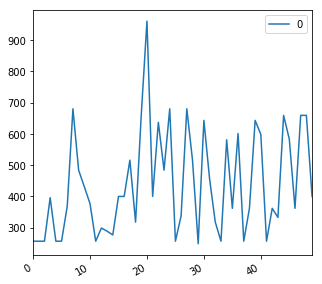

In [694]:
Y_pred.plot(subplots=True, figsize=(5, 5)) 

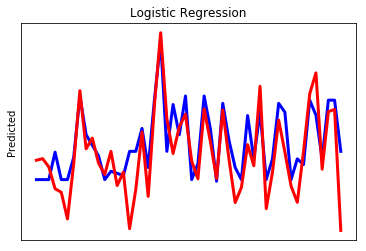

In [700]:
plt.plot(Y_pred, color='blue',
         linewidth=3)
plt.plot(dfymmstest2, color='red',
         linewidth=3)
plt.ylabel('Predicted')
plt.title('Logistic Regression')
plt.xticks(())
plt.yticks(())

plt.show()

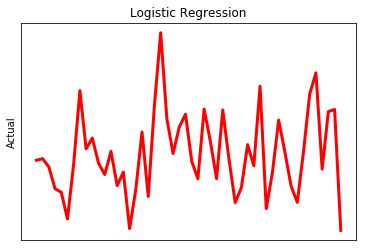

In [699]:
plt.plot(dfymmstest2, color='red',
         linewidth=3)
plt.ylabel('Actual')
plt.title('Logistic Regression')
plt.xticks(())
plt.yticks(())

plt.show()

In [626]:
Y_pred

array([277, 332, 257, 396, 426, 257, 369, 680, 484, 431, 588, 249, 500,
       257, 332, 105, 400, 500, 318, 661, 960, 362, 637, 746, 582, 332,
       249, 643, 516, 338, 643, 332, 318, 332, 581, 362, 484, 257, 362,
       680, 731, 402, 362, 333, 659, 196, 362, 659, 659, 671], dtype=int64)

In [627]:
mse = np.mean((dfymmstest2 - Y_pred) ** 2)
print(mse)

78436.4056


In [633]:
svc = SVC()
svc.fit(dfmmstrain1, dfymmstrain1)
Y_pred = svc.predict(dfmmstest1)
acc_svc = svc.score(dfmmstest1, dfymmstest2)
acc_svc

E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0

In [634]:
mse = np.mean((dfymmstest2 - Y_pred) ** 2)
print(mse)

122906.34


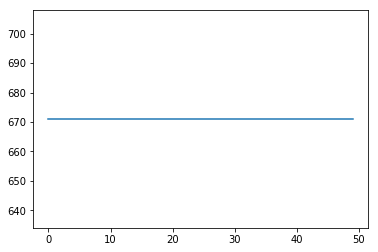

In [612]:
plt.plot(Y_pred)

In [701]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(dfmmstrain1, dfymmstrain1)
Y_pred = knn.predict(dfmmstest1)
acc_knn = round(knn.score(dfmmstest1, dfymmstest2) * 100, 2)
acc_knn

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


2.0

In [702]:
mse = np.mean((dfymmstest2 - Y_pred) ** 2)
print(mse)

ValueError: Unable to coerce to Series, length must be 1: given 50

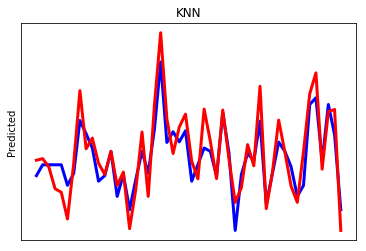

In [703]:
plt.plot(Y_pred, color='blue',
         linewidth=3)
plt.plot(dfymmstest2, color='red',
         linewidth=3)
plt.ylabel('Predicted')
plt.title('KNN')
plt.xticks(())
plt.yticks(())

plt.show()

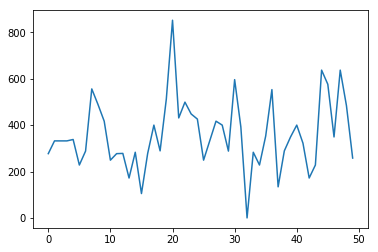

In [614]:
plt.plot(Y_pred)

In [641]:
perceptron = Perceptron()
perceptron.fit(dfmmstrain1, dfymmstrain1)
Y_pred = perceptron.predict(dfmmstest1)
acc_perceptron = round(perceptron.score(dfmmstest1, dfymmstest1) * 100, 2)
acc_perceptron

E:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [100, 50]

In [642]:
mse = np.mean((dfymmstest2 - Y_pred) ** 2)
print(mse)

58557.4664


In [706]:
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(dfmmstrain1, dfymmstrain1)
Y_pred = random_forest.predict(dfmmstest1)
random_forest.score(dfmmstest1, dfymmstest2)
acc_random_forest = random_forest.score(dfmmstest1, dfymmstest2)
acc_random_forest

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.02

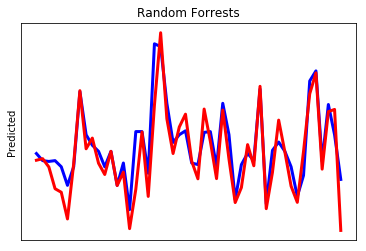

In [708]:
plt.plot(Y_pred, color='blue',
         linewidth=3)
plt.plot(dfymmstest2, color='red',
         linewidth=3)
plt.ylabel('Predicted')
plt.title('Random Forrests')
plt.xticks(())
plt.yticks(())

plt.show()

In [645]:
mse = np.mean((dfymmstest2 - Y_pred) ** 2)
print(mse)

69904.38


In [418]:
dfmmstrainlin1 = pd.read_csv('dfmmstrainlin.csv')

In [419]:
dfmmstrainlin1.head()

GenCalifornia...petroleum.coke.thousand.megawatthours  \
0                                           0.000000       
1                                           0.021270       
2                                           0.742630       
3                                           0.012880       
4                                           0.004687       

   GenCalifornia...other.renewables.thousand.megawatthours       GDP  \
0                                           0.810667        0.826764   
1                                           0.632705        0.691060   
2                                           0.070433        0.068824   
3                                           0.514021        0.583692   
4                                           0.381012        0.510833   

   BioMass.Prod.Trill.BTU.  GeoConsump.TrillBtu.  Solar.Consump.TrillionBTU.  \
0                 0.941206              0.744027                    0.524469   
1                 0.978669              0.760781                    0.396925   
2                 0.171298              0.327652                    0.000000   
3                 0.857486              0.736888                    0.220653   
4                 0.790845              0.724796                    0.158216   

   WindConsump.TrillBTU.  \
0               0.501653   
1               0.394131   
2               0.008313   
3               0.642789   
4               0.490730   

   Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.  \
0                                           0.956640                       
1                                           0.922764                       
2                                           0.158537                       
3                                           0.651762                       
4                                           0.582656                       

   Electricity.Imports..Billion.Kilowatthours.  \
0                                     0.985636   
1                                     0.909133   
2                                     0.344731   
3                                     0.798907   
4                                     0.720843   

   Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.  \
0                                           0.953725                                          
1                                           0.894557                                          
2                                           0.178078                                          
3                                           0.776222                                          
4                                           0.617621                                          

   Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.  \
0                                           0.238339                                                    
1                                           0.231501                                                    
2                                           0.624237                                                    
3                                           0.312528                                                    
4                                           0.281617                                                    

   Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.  
0                                           0.928337                       
1                                           0.760833                       
2                                           0.090525                       
3                                           0.392751                       
4                                           0.649837

In [420]:
for i in range(len(columns)):
    dfmmstrainlin1[columns[i]] = pd.cut(dfmmstrainlin1[columnsold[i]], bins, labels=labels)
dfmmstrainlin1.head()

GenCalifornia...petroleum.coke.thousand.megawatthours  \
0                                           0.000000       
1                                           0.021270       
2                                           0.742630       
3                                           0.012880       
4                                           0.004687       

   GenCalifornia...other.renewables.thousand.megawatthours       GDP  \
0                                           0.810667        0.826764   
1                                           0.632705        0.691060   
2                                           0.070433        0.068824   
3                                           0.514021        0.583692   
4                                           0.381012        0.510833   

   BioMass.Prod.Trill.BTU.  GeoConsump.TrillBtu.  Solar.Consump.TrillionBTU.  \
0                 0.941206              0.744027                    0.524469   
1                 0.978669              0.760781                    0.396925   
2                 0.171298              0.327652                    0.000000   
3                 0.857486              0.736888                    0.220653   
4                 0.790845              0.724796                    0.158216   

   WindConsump.TrillBTU.  \
0               0.501653   
1               0.394131   
2               0.008313   
3               0.642789   
4               0.490730   

   Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.  \
0                                           0.956640                       
1                                           0.922764                       
2                                           0.158537                       
3                                           0.651762                       
4                                           0.582656                       

   Electricity.Imports..Billion.Kilowatthours.  \
0                                     0.985636   
1                                     0.909133   
2                                     0.344731   
3                                     0.798907   
4                                     0.720843   

   Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.  \
0                                           0.953725                                          
1                                           0.894557                                          
2                                           0.178078                                          
3                                           0.776222                                          
4                                           0.617621                                          

                                    ...                                     \
0                                   ...                                      
1                                   ...                                      
2                                   ...                                      
3                                   ...                                      
4                                   ...                                      

   GDP3  BioMass.Prod.Trill.BTU.4 GeoConsump.TrillBtu.5  \
0   827                       942                   745   
1   692                       979                   761   
2    69                       172                   328   
3   584                       858                   737   
4   511                       791                   725   

  Solar.Consump.TrillionBTU.6 WindConsump.TrillBTU.7  \
0                         525                    502   
1                         397                    395   
2                           0                      9   
3                         221                    643   
4                         159                    491   

  Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthour

In [421]:
dfmmstrainlin1.drop(['GenCalifornia...petroleum.coke.thousand.megawatthours', 'GenCalifornia...other.renewables.thousand.megawatthours', 'GDP', 'BioMass.Prod.Trill.BTU.', 'GeoConsump.TrillBtu.', 'Solar.Consump.TrillionBTU.', 'WindConsump.TrillBTU.', 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.', 'Electricity.Imports..Billion.Kilowatthours.', 'Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.'], axis=1, inplace=True)

In [424]:
dfmmstrainlin1.head()

GenCalifornia...petroleum.coke.thousand.megawatthours1  \
0                                                  0       
1                                                 22       
2                                                743       
3                                                 13       
4                                                  5       

  GenCalifornia...other.renewables.thousand.megawatthours2 GDP3  \
0                                                811        827   
1                                                633        692   
2                                                 71         69   
3                                                515        584   
4                                                382        511   

  BioMass.Prod.Trill.BTU.4 GeoConsump.TrillBtu.5 Solar.Consump.TrillionBTU.6  \
0                      942                   745                         525   
1                      979                   761                         397   
2                      172                   328                           0   
3                      858                   737                         221   
4                      791                   725                         159   

  WindConsump.TrillBTU.7  \
0                    502   
1                    395   
2                      9   
3                    643   
4                    491   

  Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.8  \
0                                                957                       
1                                                923                       
2                                                159                       
3                                                652                       
4                                                583                       

  Electricity.Imports..Billion.Kilowatthours.9  \
0                                          986   
1                                          910   
2                                          345   
3                                          799   
4                                          721   

  Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.10  \
0                                                954                                           
1                                                895                                           
2                                                179                                           
3                                                777                                           
4                                                618                                           

  Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.11  \
0                                                239                                                     
1                                                232                                                     
2                                                625                                                     
3                                                313                                                     
4                                                282                                                     

  Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.12  
0                                                929                        
1                                                761                        
2                                                 91                        
3                                                393                        
4                                                650

In [425]:
dfmmstestlin1 = pd.read_csv('dfmmstestlin.csv')
dfmmstestlin1.head()

GenCalifornia...petroleum.coke.thousand.megawatthours  \
0                                           0.000000       
1                                           0.021270       
2                                           0.742630       
3                                           0.012880       
4                                           0.004687       

   GenCalifornia...other.renewables.thousand.megawatthours       GDP  \
0                                           0.810667        0.826764   
1                                           0.632705        0.691060   
2                                           0.070433        0.068824   
3                                           0.514021        0.583692   
4                                           0.381012        0.510833   

   BioMass.Prod.Trill.BTU.  GeoConsump.TrillBtu.  Solar.Consump.TrillionBTU.  \
0                 0.941206              0.744027                    0.524469   
1                 0.978669              0.760781                    0.396925   
2                 0.171298              0.327652                    0.000000   
3                 0.857486              0.736888                    0.220653   
4                 0.790845              0.724796                    0.158216   

   WindConsump.TrillBTU.  \
0               0.501653   
1               0.394131   
2               0.008313   
3               0.642789   
4               0.490730   

   Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.  \
0                                           0.956640                       
1                                           0.922764                       
2                                           0.158537                       
3                                           0.651762                       
4                                           0.582656                       

   Electricity.Imports..Billion.Kilowatthours.  \
0                                     0.985636   
1                                     0.909133   
2                                     0.344731   
3                                     0.798907   
4                                     0.720843   

   Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.  \
0                                           0.953725                                          
1                                           0.894557                                          
2                                           0.178078                                          
3                                           0.776222                                          
4                                           0.617621                                          

   Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.  \
0                                           0.238339                                                    
1                                           0.231501                                                    
2                                           0.624237                                                    
3                                           0.312528                                                    
4                                           0.281617                                                    

   Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.  
0                                           0.928337                       
1                                           0.760833                       
2                                           0.090525                       
3                                           0.392751                       
4                                           0.649837

In [426]:
for i in range(len(columns)):
    dfmmstestlin1[columns[i]] = pd.cut(dfmmstestlin1[columnsold[i]], bins, labels=labels)
dfmmstestlin1.head()

GenCalifornia...petroleum.coke.thousand.megawatthours  \
0                                           0.000000       
1                                           0.021270       
2                                           0.742630       
3                                           0.012880       
4                                           0.004687       

   GenCalifornia...other.renewables.thousand.megawatthours       GDP  \
0                                           0.810667        0.826764   
1                                           0.632705        0.691060   
2                                           0.070433        0.068824   
3                                           0.514021        0.583692   
4                                           0.381012        0.510833   

   BioMass.Prod.Trill.BTU.  GeoConsump.TrillBtu.  Solar.Consump.TrillionBTU.  \
0                 0.941206              0.744027                    0.524469   
1                 0.978669              0.760781                    0.396925   
2                 0.171298              0.327652                    0.000000   
3                 0.857486              0.736888                    0.220653   
4                 0.790845              0.724796                    0.158216   

   WindConsump.TrillBTU.  \
0               0.501653   
1               0.394131   
2               0.008313   
3               0.642789   
4               0.490730   

   Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.  \
0                                           0.956640                       
1                                           0.922764                       
2                                           0.158537                       
3                                           0.651762                       
4                                           0.582656                       

   Electricity.Imports..Billion.Kilowatthours.  \
0                                     0.985636   
1                                     0.909133   
2                                     0.344731   
3                                     0.798907   
4                                     0.720843   

   Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.  \
0                                           0.953725                                          
1                                           0.894557                                          
2                                           0.178078                                          
3                                           0.776222                                          
4                                           0.617621                                          

                                    ...                                     \
0                                   ...                                      
1                                   ...                                      
2                                   ...                                      
3                                   ...                                      
4                                   ...                                      

   GDP3  BioMass.Prod.Trill.BTU.4 GeoConsump.TrillBtu.5  \
0   827                       942                   745   
1   692                       979                   761   
2    69                       172                   328   
3   584                       858                   737   
4   511                       791                   725   

  Solar.Consump.TrillionBTU.6 WindConsump.TrillBTU.7  \
0                         525                    502   
1                         397                    395   
2                           0                      9   
3                         221                    643   
4                         159                    491   

  Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthour

In [428]:
dfmmstestlin1.drop(['GenCalifornia...petroleum.coke.thousand.megawatthours', 'GenCalifornia...other.renewables.thousand.megawatthours', 'GDP', 'BioMass.Prod.Trill.BTU.', 'GeoConsump.TrillBtu.', 'Solar.Consump.TrillionBTU.', 'WindConsump.TrillBTU.', 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.', 'Electricity.Imports..Billion.Kilowatthours.', 'Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.'], axis=1, inplace=True)

In [429]:
dfmmstestlin1.head()

GenCalifornia...petroleum.coke.thousand.megawatthours1  \
0                                                  0       
1                                                 22       
2                                                743       
3                                                 13       
4                                                  5       

  GenCalifornia...other.renewables.thousand.megawatthours2 GDP3  \
0                                                811        827   
1                                                633        692   
2                                                 71         69   
3                                                515        584   
4                                                382        511   

  BioMass.Prod.Trill.BTU.4 GeoConsump.TrillBtu.5 Solar.Consump.TrillionBTU.6  \
0                      942                   745                         525   
1                      979                   761                         397   
2                      172                   328                           0   
3                      858                   737                         221   
4                      791                   725                         159   

  WindConsump.TrillBTU.7  \
0                    502   
1                    395   
2                      9   
3                    643   
4                    491   

  Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.8  \
0                                                957                       
1                                                923                       
2                                                159                       
3                                                652                       
4                                                583                       

  Electricity.Imports..Billion.Kilowatthours.9  \
0                                          986   
1                                          910   
2                                          345   
3                                          799   
4                                          721   

  Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.10  \
0                                                954                                           
1                                                895                                           
2                                                179                                           
3                                                777                                           
4                                                618                                           

  Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.11  \
0                                                239                                                     
1                                                232                                                     
2                                                625                                                     
3                                                313                                                     
4                                                282                                                     

  Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.12  
0                                                929                        
1                                                761                        
2                                                 91                        
3                                                393                        
4                                                650

In [430]:
dfymmstrainlin1 = pd.read_csv('dfymmstrainlin.csv')
dfymmstrainlin1.head()

Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour
0                                           0.956962                                          
1                                           0.964557                                          
2                                           0.239241                                          
3                                           0.527848                                          
4                                           0.410127

In [432]:
dfymmstrainlin1['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1'] = pd.cut(dfymmstrainlin1['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour'], bins, labels=labels)
dfymmstrainlin1.head()

Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour  \
0                                           0.956962                                             
1                                           0.964557                                             
2                                           0.239241                                             
3                                           0.527848                                             
4                                           0.410127                                             

  Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1  
0                                                957                                            
1                                                965                                            
2                                                240                                            
3                                                528                                            
4                                                411

In [433]:
dfymmstrainlin1.drop(['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour'], axis=1, inplace=True)

In [434]:
dfymmstestlin1 = pd.read_csv('dfymmstest1lin.csv')
dfymmstestlin1.head()

Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour
0                                           0.419683                                          
1                                           0.426471                                          
2                                           0.391403                                          
3                                           0.299774                                          
4                                           0.285068

In [435]:
dfymmstestlin1['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1'] = pd.cut(dfymmstestlin1['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour'], bins, labels=labels)
dfymmstestlin1.head()

Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour  \
0                                           0.419683                                             
1                                           0.426471                                             
2                                           0.391403                                             
3                                           0.299774                                             
4                                           0.285068                                             

  Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1  
0                                                420                                            
1                                                427                                            
2                                                392                                            
3                                                300                                            
4                                                286

In [436]:
dfymmstestlin1.drop(['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour'], axis=1, inplace=True)

Coefficients: [[-0.09196771  0.01276062  0.18784055  0.15401558 -0.19229645  0.22837288
  -0.26650288  0.1317181  -0.08211836  0.13742523 -0.10702746  0.45230424]]
Mean squared error: Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1    8164.519417
dtype: float64


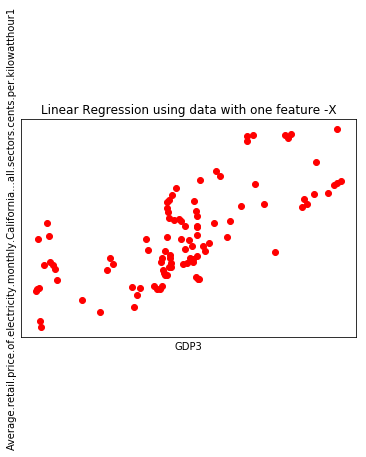

In [437]:
regr = LinearRegression()

regr.fit(dfmmstrainlin1, dfymmstrainlin1)
Z_reg=regr.predict(dfmmstestlin1)

print('Coefficients:', regr.coef_)
print("Mean squared error:",np.mean((Z_reg - dfymmstrainlin1) ** 2))

plt.scatter(dfmmstrainlin1['GDP3'], dfymmstrainlin1,  color='red')
#plt.plot(dfmmstrain1['GDP3'], Z_reg, color='blue',
         #linewidth=1.01)
plt.xlabel('GDP3')
plt.ylabel('Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour1')
plt.title('Linear Regression using data with one feature -X')
plt.xticks(())
plt.yticks(())

plt.show()

In [438]:
from sklearn import linear_model
linear_model = linear_model.LinearRegression()
linear_model.fit(dfmmstrainlin1, dfymmstrainlin1)
training_accuracy=linear_model.score(dfmmstrainlin1, dfymmstrainlin1)
print ('Training Accuracy:',training_accuracy)
validation_accuracy=linear_model.score(dfmmstestlin1,dfymmstestlin1)
print('Accuracy of the model on unseen validation data: ',validation_accuracy)
y_pred = linear_model.predict(dfmmstestlin1)

Training Accuracy: 0.844621582187
Accuracy of the model on unseen validation data:  -0.845564977907


In [ ]:
from sklearn.linear_model import LinearRegression

def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    x = 1 + (x_reg*.1)
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(dataX[predictors],y_reg)
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(dataX['x'],y_pred,color='darkred', marker='.', ms=4)
        plt.plot(dataX['x'],y_reg, color='blue',marker='.', ms=4)
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-y_reg)**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [283]:
PetCokeM = dfmmstrain1['GenCalifornia...petroleum.coke.thousand.megawatthours'].max()
PetCokeM

KeyError: 'GenCalifornia...petroleum.coke.thousand.megawatthours'

In [215]:
maxval = []
#columns = ['GenCalifornia...petroleum.coke.thousand.megawatthours', 'GenCalifornia...other.renewables.thousand.megawatthours', 'GDP', 'BioMass.Prod.Trill.BTU.', 'GeoConsump.TrillBtu.', 'Solar.Consump.TrillionBTU.', 'WindConsump.TrillBTU.', 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.', 'Electricity.Imports..Billion.Kilowatthours.', 'Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.', 'Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour']
columns = [0,1,2,3,4,5,6,7,8,9,10,11]
for i in columns:
    a = dfmmstrain[i].max()
    maxval.append(a)
print(maxval)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99999999999999989, 1.0, 1.0, 1.0000000000000002, 1.0000000000000002, 1.0]


In [217]:
minval = []
#columns = ['GenCalifornia...petroleum.coke.thousand.megawatthours', 'GenCalifornia...other.renewables.thousand.megawatthours', 'GDP', 'BioMass.Prod.Trill.BTU.', 'GeoConsump.TrillBtu.', 'Solar.Consump.TrillionBTU.', 'WindConsump.TrillBTU.', 'Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.', 'Electricity.Imports..Billion.Kilowatthours.', 'Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.', 'Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.', 'Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour']
columns = [0,1,2,3,4,5,6,7,8,9,10,11]
for i in columns:
    a = dfmmstrain[i].min()
    minval.append(a)
print(minval)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


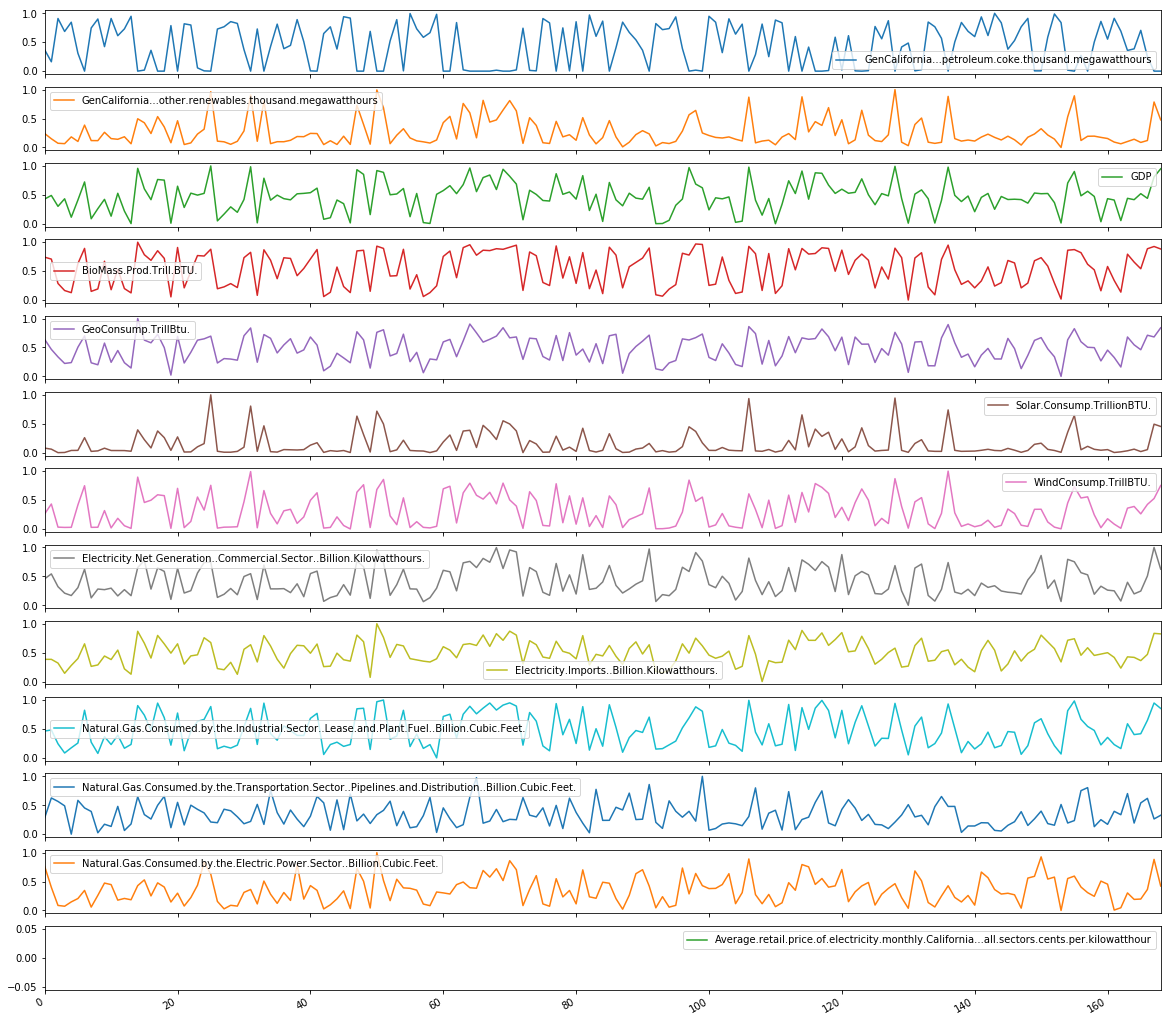

In [216]:
dfmmstrain1.plot(subplots=True, figsize=(20, 20)); # Plotting Individual Columns

In [121]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=5)
    rolstd = pd.rolling_std(timeseries, window=5)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


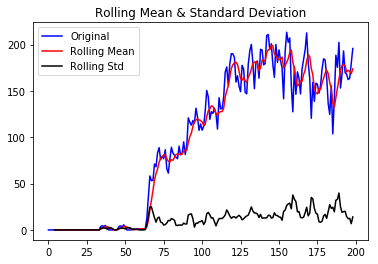

Results of Dickey-Fuller Test:
Test Statistic                  -0.801609
p-value                          0.818649
#Lags Used                      12.000000
Number of Observations Used    186.000000
Critical Value (1%)             -3.466005
Critical Value (5%)             -2.877208
Critical Value (10%)            -2.575122
dtype: float64


In [127]:
test_stationarity(PetCoke)


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


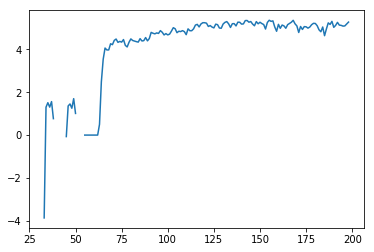

In [128]:
PetCoke_log = np.log(PetCoke)
plt.plot(PetCoke_log)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """Entry point for launching an IPython kernel.


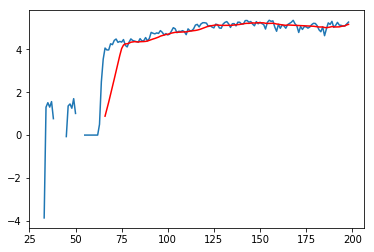

In [129]:
moving_avg = pd.rolling_mean(PetCoke_log,12)
plt.plot(PetCoke_log)
plt.plot(moving_avg, color='red')

In [148]:
PetCoke_log_moving_avg_diff = pd.DataFrame(PetCoke_log - moving_avg)
PetCoke_log_moving_avg_diff

0
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
..        ...
169  0.072959
170 -0.029646
171 -0.330892
172 -0.043200
173 -0.176604
174 -0.038088
175 -0.042972
176 -0.105482
177 -0.045418
178  0.069394
179  0.136426
180  0.142741
181  0.045550
182 -0.131186
183 -0.224099
184 -0.001151
185 -0.382560
186 -0.060345
187  0.209365
188  0.123178
189  0.244036
190 -0.024962
191  0.074429
192  0.211131
193  0.080918
194  0.051914
195 -0.005114
196 -0.000009
197  0.045213
198  0.106316

[199 rows x 1 columns]

In [149]:
PetCoke_log_moving_avg_diff.dropna(inplace=True)
#PetCoke_log_moving_avg_diff = PetCoke_log_moving_avg_diff.iloc[:,:1].values
#test_stationarity(PetCoke_log_moving_avg_diff)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version
  """Entry point for launching an IPython kernel.


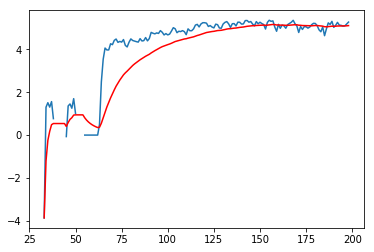

In [150]:
expwighted_avg = pd.ewma(PetCoke_log, halflife=12)
plt.plot(PetCoke_log)
plt.plot(expwighted_avg, color='red')

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  """
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  


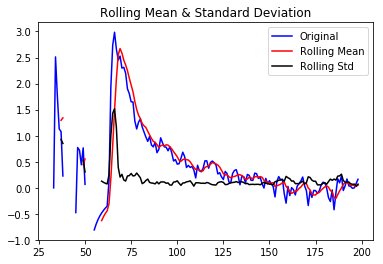

Results of Dickey-Fuller Test:


E:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1926: RuntimeWarning: invalid value encountered in subtract
  return a[slice1]-a[slice2]
E:\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)


LinAlgError: SVD did not converge

In [151]:
PetCoke_log_ewma_diff = PetCoke_log - expwighted_avg
test_stationarity(PetCoke_log_ewma_diff)